In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Kaggle'daki veriyi yükle
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# Veriyi ayır
X = train_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y = to_categorical(train_data['label'])

# Eğitim ve doğrulama verisine böl
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(X_train)

model = Sequential([
    # İlk evrişim bloğu
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),  # Batch Normalization ekleme
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # İkinci evrişim bloğu
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Üçüncü evrişim bloğu
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Tam bağlantılı (Dense) katmanlar
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 sınıf için softmax
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=128),  # Veri artırmayı burada kullanıyoruz
    epochs=32,
    validation_data=(X_val, y_val)
)


Epoch 1/32
263/263 ━━━━━━━━━━━━━━━━━━━━ 63s 224ms/step - accuracy: 0.5627 - loss: 1.4257 - val_accuracy: 0.1082 - val_loss: 5.6258
Epoch 2/32
263/263 ━━━━━━━━━━━━━━━━━━━━ 56s 211ms/step - accuracy: 0.9359 - loss: 0.2147 - val_accuracy: 0.9781 - val_loss: 0.0724
Epoch 3/32
263/263 ━━━━━━━━━━━━━━━━━━━━ 56s 210ms/step - accuracy: 0.9605 - loss: 0.1428 - val_accuracy: 0.9873 - val_loss: 0.0378
Epoch 4/32
263/263 ━━━━━━━━━━━━━━━━━━━━ 56s 210ms/step - accuracy: 0.9684 - loss: 0.1106 - val_accuracy: 0.9861 - val_loss: 0.0435
Epoch 5/32
263/263 ━━━━━━━━━━━━━━━━━━━━ 55s 207ms/step - accuracy: 0.9732 - loss: 0.0921 - val_accuracy: 0.9908 - val_loss: 0.0254
Epoch 6/32
263/263 ━━━━━━━━━━━━━━━━━━━━ 55s 209ms/step - accuracy: 0.9739 - loss: 0.0915 - val_accuracy: 0.9923 - val_loss: 0.0250
Epoch 7/32
263/263 ━━━━━━━━━━━━━━━━━━━━ 56s 213ms/step - accuracy: 0.9794 - loss: 0.0719 - val_accuracy: 0.9910 - val_loss: 0.0267
Epoch 8/32
263/263 ━━━━━━━━━━━━━━━━━━━━ 54s 205ms/step - accuracy: 0.9785 - loss: 0

In [54]:
model.save('digit_recognizer_model_v2.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


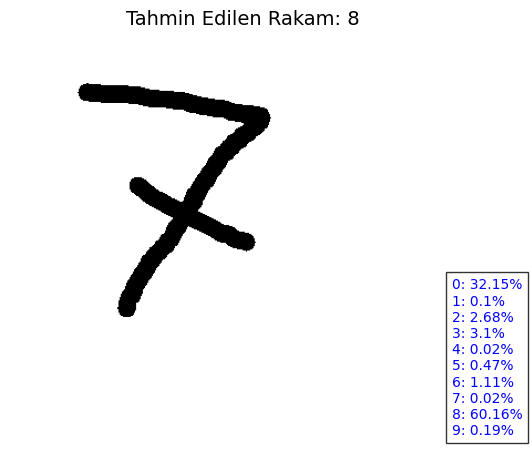

In [69]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

model = load_model('/kaggle/working/digit_recognizer_model_v2.h5')

img_path = '/kaggle/input/number2/Ekran grnts 2024-11-22 175349.png'
img_original = Image.open(img_path)
img_gray = img_original.convert('L')
img_resized = img_gray.resize((28, 28))

img_array = np.array(img_resized) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)

plt.figure(figsize=(6, 6))
plt.imshow(img_original, cmap='gray')
plt.title(f'Tahmin Edilen Rakam: {predicted_digit}', fontsize=14)
plt.axis('off')

probabilities_text = "\n".join(
    [f"{i}: {round(p * 100, 2)}%" for i, p in enumerate(prediction[0])]
)

plt.gca().text(
    0.95, 0.05, 
    probabilities_text,
    fontsize=10,
    color='blue',
    bbox=dict(facecolor='white', alpha=0.8),
    ha='left',  
    va='bottom', 
    transform=plt.gca().transAxes,
)

plt.show()


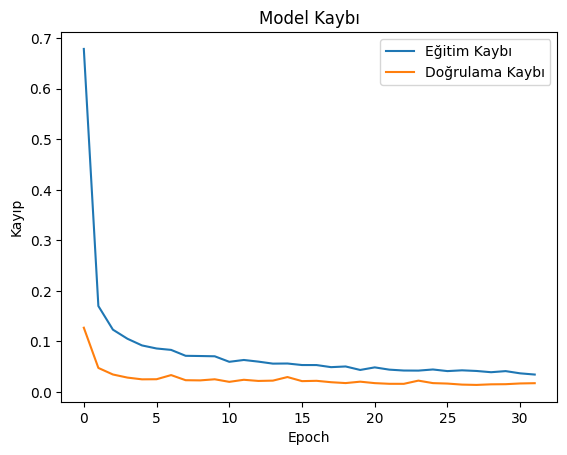

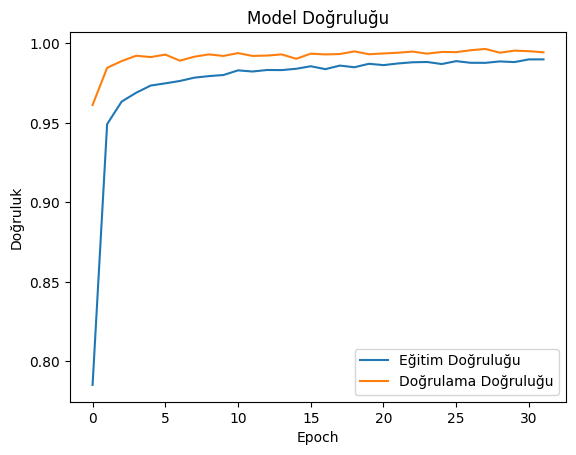

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


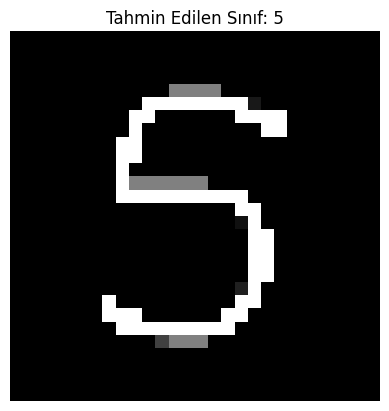

In [75]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

model = load_model('/kaggle/working/digit_recognizer_model_v2.h5')

img_path = '/kaggle/input/testnumber/Ekran grnts 2024-11-20 215540.png' 
img = load_img(img_path, target_size=(28, 28), color_mode='grayscale')  
img_array = img_to_array(img) / 255.0  
img_array = img_array.reshape(1, 28, 28, 1)  

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

plt.imshow(img_array.reshape(28, 28), cmap='binary')
plt.title(f"Tahmin Edilen Sınıf: {predicted_class}")
plt.axis('off')
plt.show()
